___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Random Forest Project 

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Lending club had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016), so let's check out some of their data and keep the context in mind. This data is from before they even went public.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from [here](https://www.lendingclub.com/info/download-data.action) or just use the csv already provided. It's recommended you use the csv provided as it has been cleaned of NA values.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Import Libraries

**Import the usual libraries for pandas and plotting. You can import sklearn later on.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Get the Data

** Use pandas to read loan_data.csv as a dataframe called loans.**

In [3]:
df_loans = pd.read_csv('loan_data.csv')

** Check out the info(), head(), and describe() methods on loans.**

In [5]:
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [9]:
df_loans.describe().round(3)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000,9578.000,9578.000,9578.000,9578.000,9578.000,9578.000,9578.000,9578.000,9578.000,9578.000,9578.000,9578.000
mean,0.805,0.123,319.089,10.932,12.607,710.846,4560.767,16913.964,46.799,1.577,0.164,0.062,0.160
std,0.396,0.027,207.071,0.615,6.884,37.971,2496.930,33756.190,29.014,2.200,0.546,0.262,0.367
min,0.000,0.060,15.670,7.548,0.000,612.000,178.958,0.000,0.000,0.000,0.000,0.000,0.000
25%,1.000,0.104,163.770,10.558,7.212,682.000,2820.000,3187.000,22.600,0.000,0.000,0.000,0.000
50%,1.000,0.122,268.950,10.929,12.665,707.000,4139.958,8596.000,46.300,1.000,0.000,0.000,0.000
75%,1.000,0.141,432.762,11.291,17.950,737.000,5730.000,18249.500,70.900,2.000,0.000,0.000,0.000
max,1.000,0.216,940.140,14.528,29.960,827.000,17639.958,1207359.000,119.000,33.000,13.000,5.000,1.000


In [10]:
df_loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Exploratory Data Analysis

Let's do some data visualization! We'll use seaborn and pandas built-in plotting capabilities, but feel free to use whatever library you want. Don't worry about the colors matching, just worry about getting the main idea of the plot.

** Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**

*Note: This is pretty tricky, feel free to reference the solutions. You'll probably need one line of code for each histogram, I also recommend just using pandas built in .hist()*

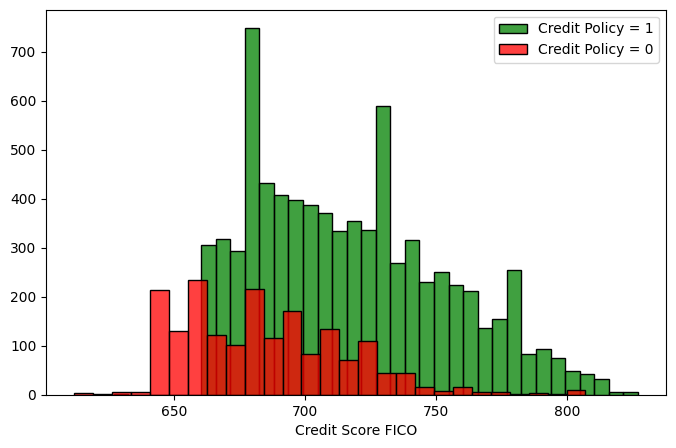

In [61]:
first_plot = df_loans[df_loans['credit.policy'] == 1]
second_plot = df_loans[df_loans['credit.policy'] == 0]

plt.figure(figsize=(8,5))
sns.histplot(data = first_plot, x = 'fico', color = 'green', label = 'Credit Policy = 1')
sns.histplot(data = second_plot, x = 'fico', color= 'red', label = 'Credit Policy = 0')
plt.legend()
plt.xlabel('Credit Score FICO')
plt.ylabel('')
plt.show()

** Create a similar figure, except this time select by the not.fully.paid column.**

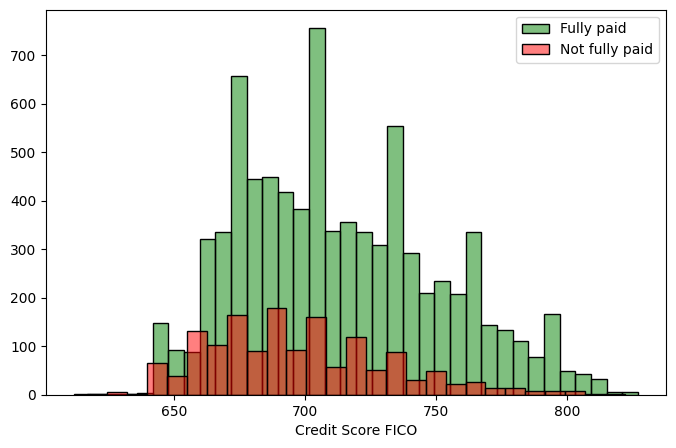

In [65]:
first_plot = df_loans[df_loans['not.fully.paid'] == 1]
second_plot = df_loans[df_loans['not.fully.paid'] == 0]

plt.figure(figsize=(8,5))
sns.histplot(data = second_plot, x = 'fico', color= 'green', label = 'Fully paid', alpha = 0.5)
sns.histplot(data = first_plot, x = 'fico', color = 'red', label = 'Not fully paid', alpha = 0.5)
plt.legend()
plt.xlabel('Credit Score FICO')
plt.ylabel('')
plt.show()

** Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid. **

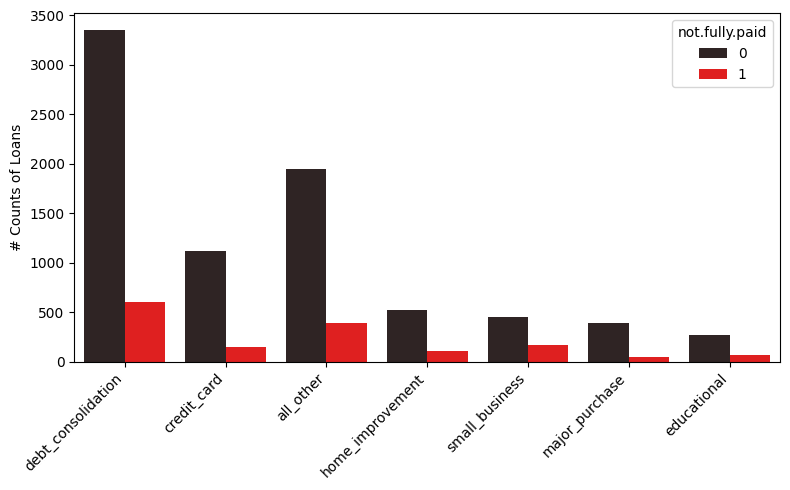

In [101]:
plt.figure(figsize=(8,5))
sns.countplot(data = df_loans, x = 'purpose', hue = 'not.fully.paid', palette= 'dark:red')
plt.xticks(rotation = 45, ha = 'right')
# plt.xticks(ticks='')
plt.xlabel('')
plt.ylabel('# Counts of Loans')
plt.tight_layout()
plt.show()

** Let's see the trend between FICO score and interest rate. Recreate the following jointplot.**

<Figure size 800x600 with 0 Axes>

<Figure size 6400x4800 with 0 Axes>

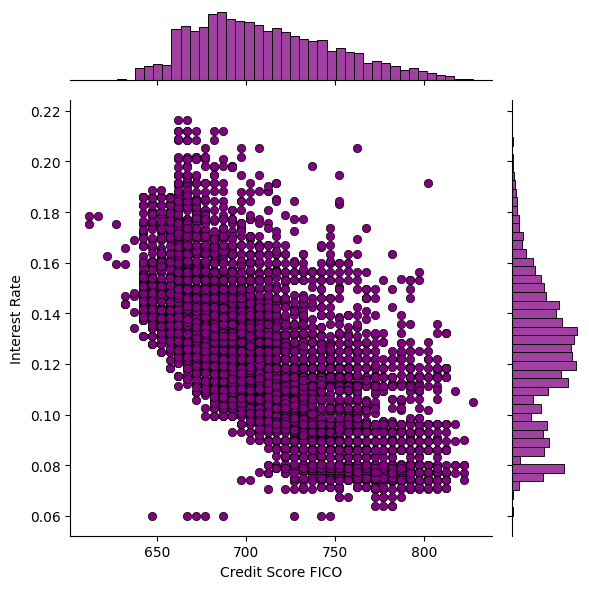

In [120]:
plt.figure(figsize=(8,6))
plt.figure(dpi=1000)

x = 'fico'
y = 'int.rate'

sns.jointplot(data = df_loans, x = x, y= y, color = 'purple', kind = 'scatter', edgecolors = 'black')

plt.ylabel('Interest Rate')
plt.xlabel('Credit Score FICO')

plt.tight_layout()
plt.show()

** Create the following lmplots to see if the trend differed between not.fully.paid and credit.policy. Check the documentation for lmplot() if you can't figure out how to separate it into columns.**

<Figure size 1100x700 with 0 Axes>

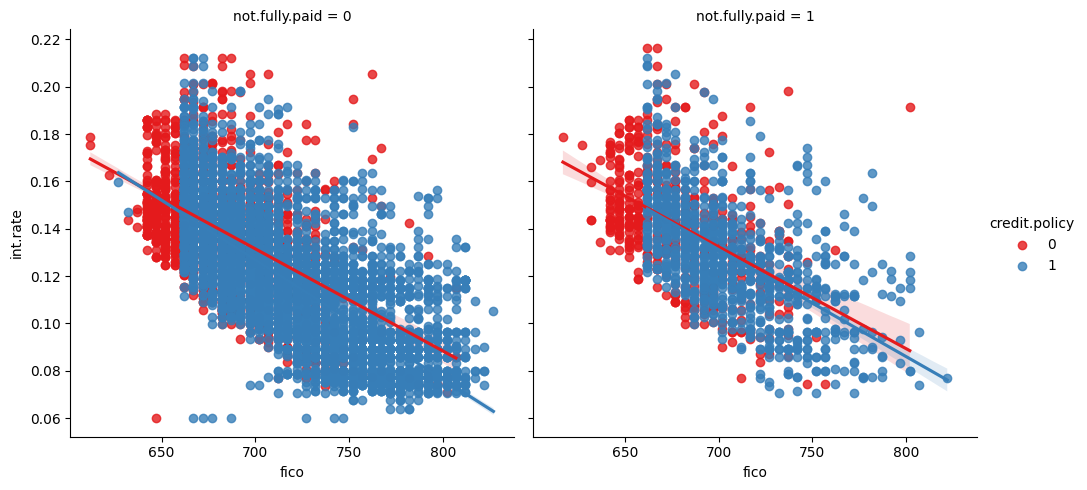

In [122]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=df_loans,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

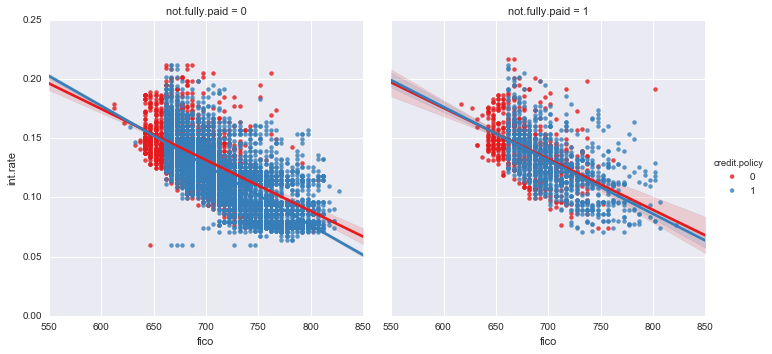

# Setting up the Data

Let's get ready to set up our data for our Random Forest Classification Model!

**Check loans.info() again.**

In [123]:
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Categorical Features

Notice that the **purpose** column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.

Let's show you a way of dealing with these columns that can be expanded to multiple categorical features if necessary.

**Create a list of 1 element containing the string 'purpose'. Call this list cat_feats.**

In [128]:
cat_feats = ['purpose']

**Now use pd.get_dummies(loans,columns=cat_feats,drop_first=True) to create a fixed larger dataframe that has new feature columns with dummy variables. Set this dataframe as final_data.**

In [159]:
final_data = pd.get_dummies(data = df_loans, columns=cat_feats, drop_first=True , dtype=int)
final_data

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


In [160]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

## Train Test Split

Now its time to split our data into a training set and a testing set!

** Use sklearn to split your data into a training set and a testing set as we've done in the past.**

In [138]:
from sklearn.model_selection import train_test_split

In [148]:
# Features 

X = final_data.drop(['not.fully.paid'], axis = 1)

# Value to Predict

y = final_data['not.fully.paid']

# Training the model

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

## Training a Decision Tree Model

Let's start by training a single decision tree first!

** Import DecisionTreeClassifier**

In [140]:
from sklearn.tree import DecisionTreeClassifier

**Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [149]:
dtree = DecisionTreeClassifier()

In [150]:
dtree.fit(X=X_train,y=y_train)

DecisionTreeClassifier()

## Predictions and Evaluation of Decision Tree
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [151]:
y_tree_predict = dtree.predict(X = X_test)

In [152]:
from sklearn.metrics import classification_report, confusion_matrix

In [153]:
dtree_classification = classification_report(y_true=y_test,y_pred=y_tree_predict)
print(dtree_classification)

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      2431
           1       0.18      0.23      0.20       443

    accuracy                           0.72      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.72      0.74      2874



In [154]:
dtree_matrix = confusion_matrix(y_true=y_test,y_pred=y_tree_predict)

In [155]:
print(dtree_matrix)

[[1977  454]
 [ 342  101]]


## Training the Random Forest model

Now its time to train our model!

**Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

In [161]:
from sklearn.ensemble import RandomForestClassifier

In [164]:
rdc = RandomForestClassifier(n_estimators=600)

In [165]:
rdc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=600)

## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

** Predict the class of not.fully.paid for the X_test data.**

In [166]:
rdc_y_pred = rdc.predict(X_test)

**Now create a classification report from the results. Do you get anything strange or some sort of warning?**

In [167]:
rdc_matrix = confusion_matrix(y_true= y_test,y_pred=rdc_y_pred)
rdc_classification = classification_report(y_true= y_test , y_pred= rdc_y_pred)

In [168]:
print(rdc_classification)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.47      0.02      0.03       443

    accuracy                           0.85      2874
   macro avg       0.66      0.51      0.48      2874
weighted avg       0.79      0.85      0.78      2874



**Show the Confusion Matrix for the predictions.**

In [169]:
print(rdc_matrix)

[[2422    9]
 [ 435    8]]


**What performed better the random forest or the decision tree?**

In [170]:
# Depends what metric you are trying to optimize for. 
# Notice the recall for each class for the models.
# Neither did very well, more feature engineering is needed.